In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_content_btc = requests.get(btc_url).json()
btc_price = response_content_btc["data"]["1"]["quotes"]["CAD"]["price"]
#print(btc_price)

# Fetch current ETH price
response_content_eth = requests.get(eth_url).json()
#print(json.dumps(response_content_eth, indent = 4))
etc_price = response_content_eth["data"]["1027"]["quotes"]["CAD"]["price"]
#print(etc_price)

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = etc_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68658.45
The current value of your 5.3 ETH is $21219.46


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
 # Format current date as ISO format
today = pd.Timestamp("2021-09-23", tz="America/New_York").isoformat()
start = pd.Timestamp("2018-09-23", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2018-09-24 00:00:00-04:00  105.33  105.46  105.3101  105.350  1771301  291.34   
2018-09-25 00:00:00-04:00  105.25  105.30  105.1800  105.290  1863777  291.53   
2018-09-26 00:00:00-04:00  105.37  105.60  105.3350  105.560  2626493  290.92   
2018-09-27 00:00:00-04:00  105.50  105.64  105.5000  105.625  2252805  290.44   
2018-09-28 00:00:00-04:00  105.69  105.71  105.5100  105.520  3859908  289.99   

                                                               
                             high       low   close    volume  
time                                                           
2018-09-24 00:00:00-04:00  291.50  290.3700  291.07  37585070  
2018-09-25 00:00:00-04:00  291.65  290.4833  290.70  30128907  
2018-09-26 00:00:00-04:00  292.24  289.4100  289.84  53536102  
2018-09-27 00:00:00-04:00  291.91  290.1000  290.65  42099964  
2018-09-28 00:00:00-04:00  291.28  289.9500  290.61  49399177

In [9]:
 # Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
df_closing_prices.head()

# Print AGG and SPY close prices
df_portfolio_current = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

agg_close_price = float(df_portfolio_current["AGG"]["close"])
spy_close_price = float(df_portfolio_current["SPY"]["close"])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.57
Current SPY closing price: $443.13


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


In [13]:
 # Set monthly household income
monthly_income=12000

# Consolidate financial assets data
crypto = round(my_btc_value + my_eth_value,2)
shares = round(my_spy_value + my_agg_value,2)

amount = {
   "amount":[crypto,shares]
}
assets = ["crypto","shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount,index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,89877.91
shares,45270.50


<AxesSubplot:ylabel='amount'>

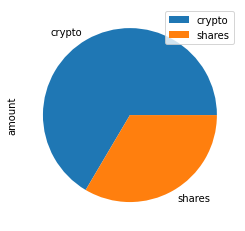

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = crypto + shares

# Validate saving health
if emergency_fund < total_saving:
    print (" Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_saving:
    print (" Congratulations! You have've reached your financial goal.")
else:
    print (f"you are ${emergency_fund-total_saving} away from your saving goal.")

 Congratulations! You have enough money in your emergency fund.


In [19]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-23', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-03 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-04 00:00:00-04:00  252.69  253.44  252.56  253.16  30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.65  253.96  23554888.0

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.
Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number o

In [23]:
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00         NaN          NaN  
2017-10-04 00:00:00-04:00  30217246.0          NaN  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vvns/Desktop/homework/homework-API/MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007170,1.002265,1.006811,0.989448,0.989489,1.004997,0.991401,0.992539,1.007459,0.997107,...,1.012309,0.996334,1.001511,1.000400,1.006869,0.996859,0.998444,0.991479,1.003578,0.999174
2,1.004908,1.008638,1.008198,0.978430,0.987845,1.014345,1.000790,0.988368,1.005651,0.994992,...,1.011023,0.997756,1.006117,0.989288,1.009155,0.996702,1.010323,0.987794,0.995266,1.005136
3,0.996421,1.012488,1.003858,0.975234,0.982040,1.012179,0.997978,0.984325,1.006784,0.992705,...,1.015653,0.992068,1.006841,0.981867,0.998495,1.010245,1.012360,0.992433,1.001333,1.007437
4,1.000391,1.012202,0.997287,0.977644,0.980444,1.007839,1.006008,0.980890,1.004950,0.988546,...,1.015301,1.001175,1.008201,0.978018,0.999886,1.009689,1.003119,0.996599,0.992146,1.007694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.903550,4.531875,12.701809,20.295228,7.628129,2.596257,3.559310,8.474154,10.855166,17.518444,...,3.450316,12.285937,6.317110,12.304872,7.096740,6.797307,7.827032,6.670954,5.170485,5.428988
7557,6.908435,4.550151,12.710165,20.482455,7.609150,2.605764,3.536984,8.467230,10.816049,17.590563,...,3.452403,12.393561,6.332256,12.429145,7.109383,6.808276,7.853501,6.689093,5.193283,5.392497
7558,6.910080,4.583875,12.644123,20.570169,7.612342,2.614494,3.507797,8.556263,10.798447,17.426114,...,3.449825,12.378652,6.382062,12.561605,7.198679,6.858978,7.812340,6.751988,5.192721,5.435571
7559,6.921731,4.552183,12.683221,20.461568,7.605148,2.603367,3.532864,8.599412,10.808858,17.506737,...,3.440214,12.453455,6.330782,12.541747,7.266928,6.858221,7.777462,6.739605,5.191841,5.418554


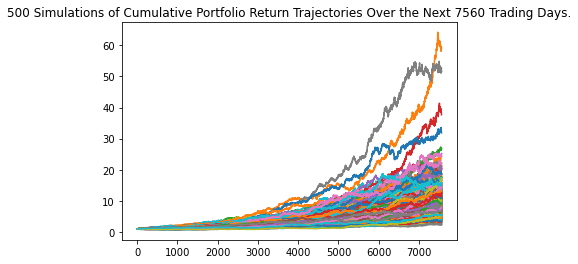

In [26]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

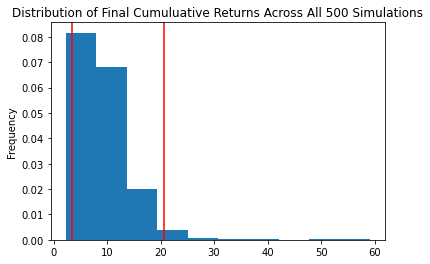

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.548007
std               5.401544
min               2.292688
25%               6.024712
50%               8.449073
75%              12.012635
max              59.153037
95% CI Lower      3.427340
95% CI Upper     20.731359
Name: 7560, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68546.79 and $414627.19


In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $102820.19 and $621940.78


In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/vvns/Desktop/homework/homework-API/MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987807,1.005715,0.999024,1.004277,1.004352,0.998540,1.010006,1.002757,0.999168,1.005389,...,0.989228,0.998829,1.003374,1.000296,0.992162,1.003359,1.009481,0.994145,1.007648,1.002682
2,0.979602,1.007016,0.997032,1.003933,1.001872,0.995659,1.019562,1.008392,1.000467,1.007281,...,0.991592,0.996656,0.999137,1.002704,0.991697,0.993465,1.011047,0.997679,1.015708,1.004389
3,0.971113,1.003905,0.999215,1.010597,0.998285,1.004814,1.028084,1.005552,1.000450,1.014206,...,0.998391,0.997386,0.991532,0.996282,0.986600,0.990723,1.014210,0.995830,1.013498,1.001044
4,0.964997,1.009473,0.996208,1.012953,0.994322,1.001398,1.027189,1.016681,0.996218,1.015804,...,0.994126,0.988577,0.982146,0.989335,0.995692,0.990745,1.018108,1.000780,1.021814,1.002576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.070989,1.587109,1.532997,1.243635,1.237570,1.482930,1.560474,1.292419,1.335661,1.833730,...,1.276933,1.063290,2.068768,1.726693,1.257889,1.569977,1.321065,1.672074,1.499776,1.467612
1257,1.066280,1.576571,1.518824,1.250423,1.239316,1.486328,1.571317,1.290654,1.334503,1.841501,...,1.269315,1.058082,2.059013,1.714423,1.255277,1.570318,1.321304,1.647885,1.494838,1.473648
1258,1.063423,1.577316,1.517114,1.249955,1.236196,1.477094,1.568805,1.302065,1.336106,1.854175,...,1.266167,1.063273,2.083550,1.714199,1.268668,1.561898,1.331403,1.660067,1.506026,1.463833
1259,1.060992,1.572135,1.523401,1.251884,1.234907,1.477599,1.558944,1.298256,1.332948,1.851543,...,1.266363,1.073240,2.086627,1.696534,1.266576,1.566476,1.325256,1.657693,1.511537,1.474575


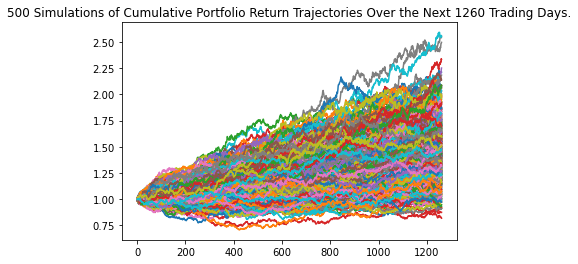

In [33]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()
line_plot_five.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

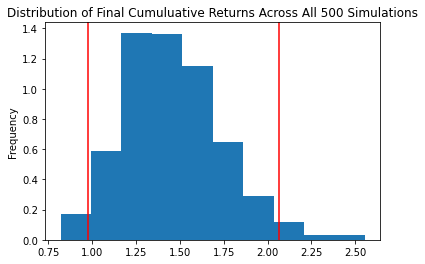

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()
dist_plot_five.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.458799
std               0.279700
min               0.819268
25%               1.260657
50%               1.429006
75%               1.632237
max               2.555216
95% CI Lower      0.978753
95% CI Upper      2.065841
Name: 1260, dtype: float64


In [36]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*20000,2)
ci_upper_five = round(tbl_five[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19575.06 and $41316.83
